# Code for generating PCA plots 
## By using the reference dataset and your own samples of interest 

Before starting one needs to have the following programs installed on their device
* [ANACONDA](https://anaconda.org/), which includes both Python and JupyterNotebook
* [PLINK](http://zzz.bwh.harvard.edu/plink/)



Import necessary python libraries/packages 

In [390]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import timeit

Go to directory where your files are stored

In [391]:
os.chdir("C:/Users/schok006/OneDrive - WageningenUR/plink_win64_20191028/")

run plink on `dataset` and create vcf file that will serve as `reference database`

In [299]:
!plink --vcf IMAGE001_23_01_BPW_PIG.vcf --double-id --allow-extra-chr 0 --recode --make-bed --out pigsdataRef
#--geno 0.1 --maf 0.1 --hwe 1e-2

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to pigsdataRef.log.
Options in effect:
  --allow-extra-chr 0
  --double-id
  --make-bed
  --out pigsdataRef
  --recode
  --vcf IMAGE001_23_01_BPW_PIG.vcf

7591 MB RAM detected; reserving 3795 MB for main workspace.

--vcf: 1k variants complete.
--vcf: 2k variants complete.
--vcf: 3k variants complete.
--vcf: 4k variants complete.
--vcf: 5k variants complete.
--vcf: 6k variants complete.
--vcf: 7k variants complete.
--vcf: 8k variants complete.
--vcf: pigsdataRef-temporary.bed + pigsdataRef-temporary.bim +
pigsdataRef-temporary.fam written.
8710 variants loaded from .bim file.
149 people (0 males, 0 females, 149 ambiguous) loaded from .fam.
Ambiguous sex IDs written to pigsdataRef.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 149 founders and 0 nonfounders present.
Calculating 

treat these as missing.


Sample of interest

In [300]:
!plink --vcf SoI.vcf --double-id --allow-extra-chr 0 --make-bed --out SoI

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to SoI.log.
Options in effect:
  --allow-extra-chr 0
  --double-id
  --make-bed
  --out SoI
  --vcf SoI.vcf

7591 MB RAM detected; reserving 3795 MB for main workspace.

--vcf: 1k variants complete.
--vcf: 2k variants complete.
--vcf: 3k variants complete.
--vcf: 4k variants complete.
--vcf: 5k variants complete.
--vcf: 6k variants complete.
--vcf: 7k variants complete.
--vcf: 8k variants complete.
--vcf: SoI-temporary.bed + SoI-temporary.bim + SoI-temporary.fam written.
8721 variants loaded from .bim file.
4 people (0 males, 0 females, 4 ambiguous) loaded from .fam.
Ambiguous sex IDs written to SoI.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 4 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%

treat these as missing.


Combine `sample of interest` with `reference database`

In [301]:
!plink --merge-list merge-list_bedbimfam.txt --double-id --allow-extra-chr 0 --recode vcf-iid --out merged_data

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to merged_data.log.
Options in effect:
  --allow-extra-chr 0
  --double-id
  --merge-list merge-list_bedbimfam.txt
  --out merged_data
  --recode vcf-iid

7591 MB RAM detected; reserving 3795 MB for main workspace.
Performing single-pass merge (153 people, 8710 variants).

Pass 1: fileset #1 complete.
                                              
Merged fileset written to merged_data.bed + merged_data.bim + merged_data.fam .
8710 variants loaded from .bim file.
153 people (0 males, 0 females, 153 ambiguous) loaded from .fam.
Ambiguous sex IDs written to merged_data.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 153 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%

treat these as missing.


Run PCA in plink

In [302]:
!plink --vcf merged_data.vcf --double-id --allow-extra-chr 0 --pca 25 --out PCA_pigsdataRef
#--geno 0.1 --maf 0.1 --hwe 1e-2

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to PCA_pigsdataRef.log.
Options in effect:
  --allow-extra-chr 0
  --double-id
  --out PCA_pigsdataRef
  --pca 25
  --vcf merged_data.vcf

7591 MB RAM detected; reserving 3795 MB for main workspace.

--vcf: 1k variants complete.
--vcf: 2k variants complete.
--vcf: 3k variants complete.
--vcf: 4k variants complete.
--vcf: 5k variants complete.
--vcf: 6k variants complete.
--vcf: 7k variants complete.
--vcf: 8k variants complete.
--vcf: PCA_pigsdataRef-temporary.bed + PCA_pigsdataRef-temporary.bim +
PCA_pigsdataRef-temporary.fam written.
8710 variants loaded from .bim file.
153 people (0 males, 0 females, 153 ambiguous) loaded from .fam.
Ambiguous sex IDs written to PCA_pigsdataRef.nosex .
Using up to 4 threads (change this with --threads).
Before main variant filters, 153 founders and 0 nonfounders present.
Calculating alle

treat these as missing.


In [448]:
data = pd.read_csv('PCA_pigsdataRef.eigenvec', sep=" ", header=None)

In [449]:
#tranform FID +IID && remove .cel
data["IID_"] = data[0].apply(str) + '_' + data[1].apply(str)
data["IID"] = data["IID_"].str.split(pat=".CEL").str[0]

Join SNP data with phenotypic data

In [450]:
pheno = pd.read_csv('legend_metadata.txt', sep="\t")

Change some headers for convenience

In [451]:
pheno.rename(columns={'Sample_ID_for_Batchregistration': 'IID'}, inplace=True)

Actual merging of the files

In [452]:
df_merge_col = pd.merge(data, pheno, left_on=["IID"], right_on=["IID"])
df_merge_col.shape

(153, 32)

Generate new column for size of symbols and special marker

In [486]:
my_color=pd.Categorical(df_merge_col.iloc[:,31]).codes
# define some sizes of the scatter marker
my_shape=pd.Categorical(df_merge_col.iloc[:,30]).codes
df_merge_col.loc[df_merge_col['breed'] != 'NEW', 'Size'] = '10' 
df_merge_col.loc[df_merge_col['breed'] == 'NEW', 'Size'] = '1000'

df_merge_col.loc[df_merge_col['breed'] != 'NEW', 'SpecialMarker'] = '0' 
df_merge_col.loc[df_merge_col['breed'] == 'NEW', 'SpecialMarker'] = '1'

Highlighting 'Sample of Interest'

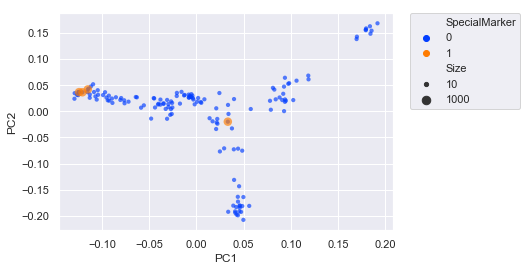

In [487]:
sns.set(style="darkgrid")
fig = plt.figure()
ax = sns.scatterplot(x=df_merge_col.iloc[:,2], y=df_merge_col.iloc[:,3], size=df_merge_col['Size'].astype('int'), 
                     alpha=0.66, hue='SpecialMarker',
                     data=df_merge_col, legend='full', palette="bright", linewidth=0)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:], title="origin")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# Set x- and y-axis label
plt.xlabel('PC1')
plt.ylabel('PC2')

fig = ax.get_figure()
fig.savefig('C:/Users/schok006/OneDrive - WageningenUR/plink_win64_20191028/PCA_highlightSoI.pdf', bbox_inches="tight")


Highlighting 'origin' (=country)

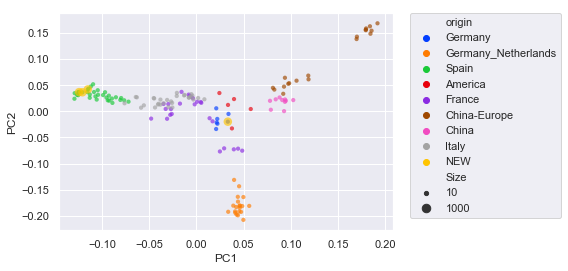

In [488]:
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D','d', 'P', 'X', 'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', '4')

sns.set(style="darkgrid")
fig = plt.figure()
ax = sns.scatterplot(x=df_merge_col.iloc[:,2], y=df_merge_col.iloc[:,3], size=df_merge_col['Size'].astype('int'), 
                     alpha=0.66, hue="origin",
                     data=df_merge_col, legend='full', palette="bright", linewidth=0)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:], title="origin")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# Set x- and y-axis label
plt.xlabel('PC1')
plt.ylabel('PC2')

fig = ax.get_figure()
fig.savefig('C:/Users/schok006/OneDrive - WageningenUR/plink_win64_20191028/PCA_origin.pdf', bbox_inches="tight")


Highlighting 'origin' + 'breed name'

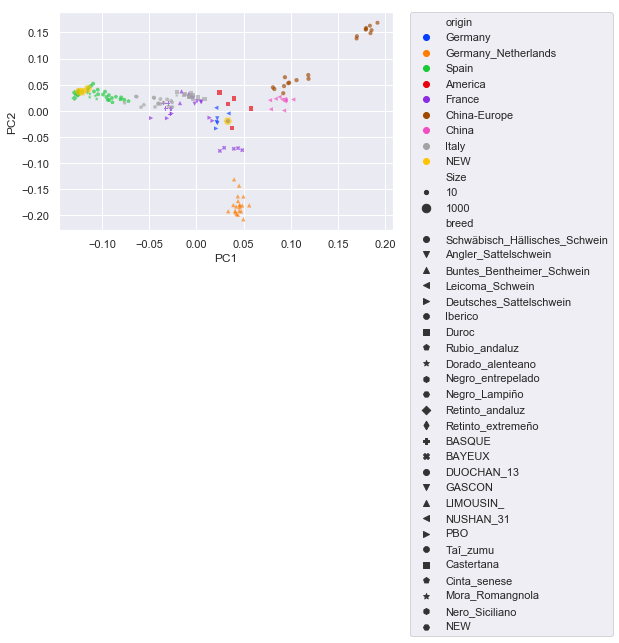

In [489]:
sns.set(style="darkgrid")
fig = plt.figure()
ax = sns.scatterplot(x=df_merge_col.iloc[:,2], y=df_merge_col.iloc[:,3], size=df_merge_col['Size'].astype('int'), 
                     alpha=0.66, hue="origin", style='breed', markers = filled_markers,
                     data=df_merge_col, legend='full', palette="bright", linewidth=0)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:], title="origin")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# Set x- and y-axis label
plt.xlabel('PC1')
plt.ylabel('PC2')

fig = ax.get_figure()
fig.savefig('C:/Users/schok006/OneDrive - WageningenUR/plink_win64_20191028/PCA_origin+breed.pdf', bbox_inches="tight")

Below teh code to generate a 3D plot of the PCA results

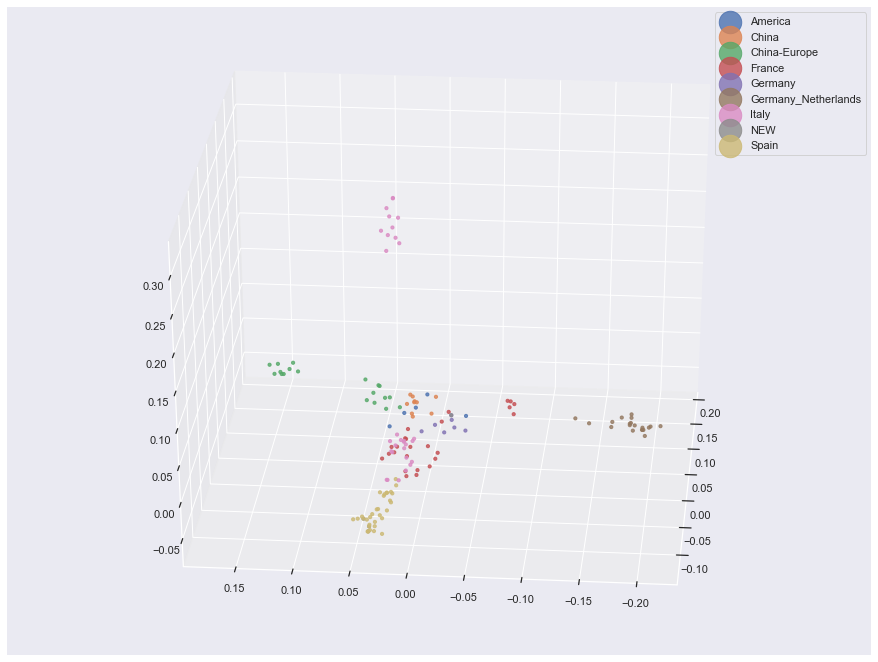

In [491]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)
for grp_name, grp_idx in df_merge_col.groupby('origin').groups.items():
    y = df_merge_col.iloc[grp_idx,3]
    x = df_merge_col.iloc[grp_idx,2]
    z = df_merge_col.iloc[grp_idx,4]
    ax.scatter(x,y,z, marker='o', alpha=0.8, s=df_merge_col['Size'].astype('int'), label=grp_name)  # this way you can control color/marker/size of each group freely
    
ax.view_init(30, 185)
ax.legend()

plt.show()
fig = ax.get_figure()
fig.savefig('C:/Users/schok006/OneDrive - WageningenUR/plink_win64_20191028/PCA3d_.pdf')